In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/train.csv')

In [3]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
df.shape

(2051, 81)

## EDA and cleaning

In [5]:
missing_counts = df.isnull().sum()
unique_missing_counts = missing_counts.unique()

for count in unique_missing_counts:
    cols = missing_counts[missing_counts == count].index.tolist()
    print(f" Missing {count} values in {cols}")


 #check how many values missing in each column

 Missing 0 values in ['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Area', 'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Exter Qual', 'Exter Cond', 'Foundation', 'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'Sale Type', 'SalePrice']
 Missing 330 values in ['Lot Frontage']
 Missing 1911 values in ['Alley']
 Missing 1240 values in ['Mas Vnr Type']
 Missing 22 values in ['Mas Vnr Area']
 Missing 55 values in ['Bsmt Qual', 'Bsmt Cond

In [6]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(df['Lot Frontage'].mean()) # filled 330 values with mean
df['Alley'] = df['Alley'].fillna('NoAccess') # NoAcess means no alley access
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(df['Mas Vnr Area']. median()) #filled 22 values with mean

df[['Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 1','Bsmt Exposure']] = df[['Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 1', 'Bsmt Exposure']].fillna('NoBasement')

#filing NA with NoBasement according to data dictionary for 'Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 1','Bsmt Exposure'

df = df.dropna(subset=['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath'])

# dropping row where these values are nan (total values dropped = 3 out of 2051)

df['Fireplace Qu'] = df['Fireplace Qu'].fillna('NoFireplace') #No fireplace from data dictionary

df['Garage Type'] = df['Garage Type'].fillna('NoGarage') #No garage from data dictionary
df[['Garage Yr Blt', 'Garage Finish', 'Garage Cond']] = df[['Garage Yr Blt', 'Garage Finish', 'Garage Cond']].fillna('NoGarage')
df[['Garage Qual']] = df[[ 'Garage Qual']].fillna('NoGarage')

# filling na with 0
df['Garage Cars'] = df['Garage Cars'].fillna(0)
df['Garage Area'] = df['Garage Area'].fillna(0)


df['Pool QC'] = df['Pool QC'].fillna('NoPool') # NoPool means no pool from data
#similarly for Fence as well as Misc_features
df['Fence'] = df['Fence'].fillna('NoFence')
df['Misc Feature'] = df['Misc Feature'].fillna('NoMisc')

In [7]:
df.shape

(2049, 81)

In [8]:
# list of columns to drop
# 'mas_vnr_type' = 1240 missing values, None is not possible, also for simplification
# 'bsmtfin_type_2' = 56 missing values 

df = df.drop(columns=['Mas Vnr Type', 'BsmtFin Type 2'])

In [9]:
df.dtypes.value_counts()

object     41
int64      28
float64    10
Name: count, dtype: int64

In [10]:
int_columns = df.select_dtypes(include=['int64']).columns
int_columns   #.isnull().sum()

Index(['Id', 'PID', 'MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')

In [11]:
float_columns = df.select_dtypes(include=['float64']).columns
float_columns       #.isnull().sum()

Index(['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Garage Cars', 'Garage Area'],
      dtype='object')

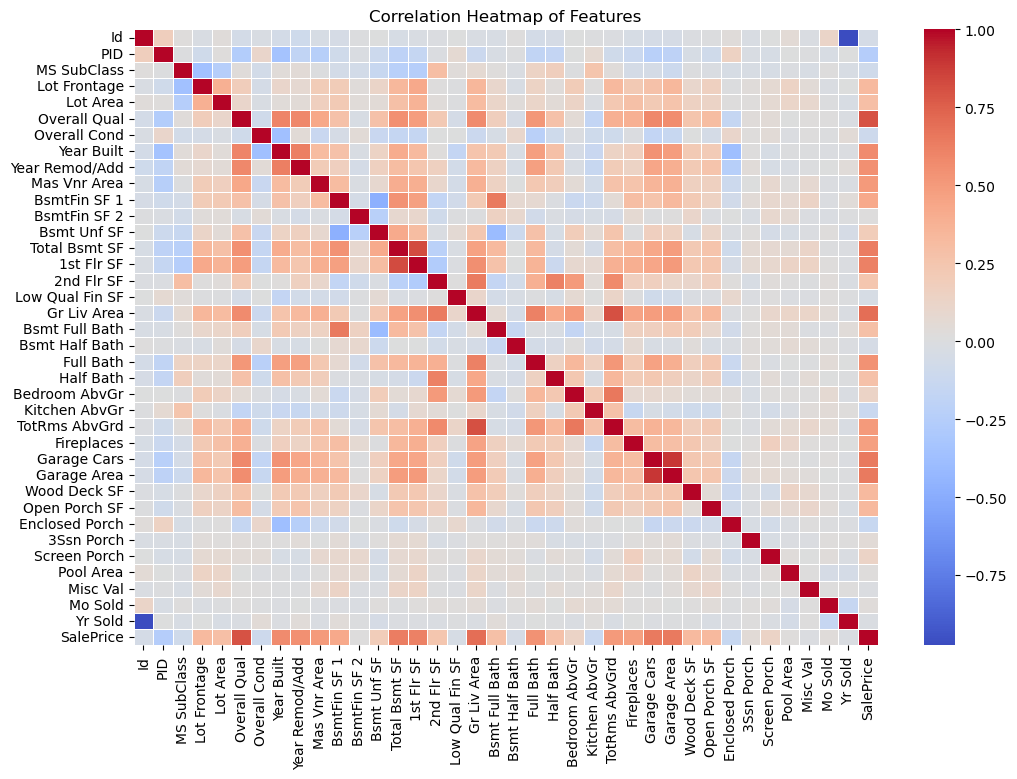

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'Heating', 'Heating QC', 'Central Air', 'Electrical',
       'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature', 'Sale Type'],
      dtype='object')

In [12]:
#correlation matrix
corr_matrix = df.corr(numeric_only=True)  # Ensure only numeric features are considered

plt.figure(figsize=(12, 8))

#heatmap using seaborn
sns.heatmap(corr_matrix, cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Heatmap of Features")
plt.show()
object_columns = df.select_dtypes(include=['object']).columns
object_columns 

In [13]:
df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.800974
Gr Liv Area        0.697821
Garage Area        0.649627
Garage Cars        0.647664
Total Bsmt SF      0.631538
1st Flr SF         0.621217
Year Built         0.572175
Year Remod/Add     0.549836
Full Bath          0.537126
Mas Vnr Area       0.504074
TotRms AbvGrd      0.502934
Fireplaces         0.470150
BsmtFin SF 1       0.424399
Open Porch SF      0.332172
Wood Deck SF       0.326847
Lot Frontage       0.326063
Lot Area           0.295137
Bsmt Full Bath     0.283662
Half Bath          0.282114
2nd Flr SF         0.248732
Bsmt Unf SF        0.191176
Bedroom AbvGr      0.135136
Screen Porch       0.134699
3Ssn Porch         0.048773
Mo Sold            0.032077
Pool Area          0.023126
BsmtFin SF 2       0.016447
Misc Val          -0.007380
Yr Sold           -0.015217
Low Qual Fin SF   -0.041628
Bsmt Half Bath    -0.045328
Id                -0.051557
MS SubClass       -0.087435
Overall Cond      -0.097185
Kitchen AbvGr     -0

Correlation Value show strength and direction of relationship between variables. In this case, the relationship is shown with SalePrice, which is the value we will be predicting. correlation value lies between -1 and 1, where 1 is perfect positive corelation and -1 is perfect negative corelation. 

Here, Overall Qual has the highest positive corelation at 0.8, this indicates , as the overall quality increases, the sale price tends to increase.
For our model we will use those numerical features that have moderate to strong positive corelation.

In [14]:
print(df.corr(numeric_only=True)['SalePrice'][df.corr(numeric_only=True)['SalePrice'] >= 0.4].sort_values(ascending=False))
#print moderate to strong positive corelation for values to be used for modeling.

SalePrice         1.000000
Overall Qual      0.800974
Gr Liv Area       0.697821
Garage Area       0.649627
Garage Cars       0.647664
Total Bsmt SF     0.631538
1st Flr SF        0.621217
Year Built        0.572175
Year Remod/Add    0.549836
Full Bath         0.537126
Mas Vnr Area      0.504074
TotRms AbvGrd     0.502934
Fireplaces        0.470150
BsmtFin SF 1      0.424399
Name: SalePrice, dtype: float64


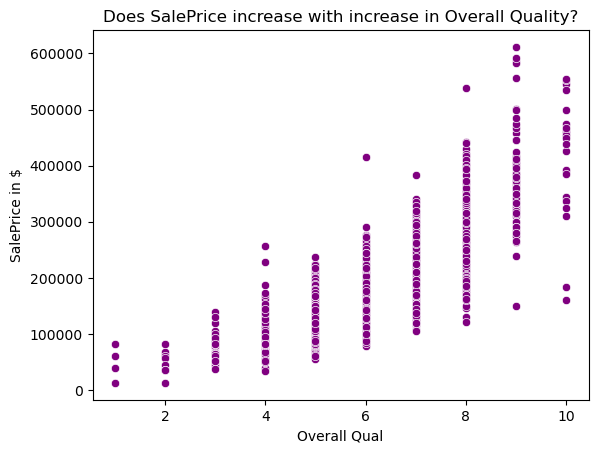

In [15]:
sns.scatterplot(x='Overall Qual', y='SalePrice', data=df, color = 'purple')
plt.title('Does SalePrice increase with increase in Overall Quality?')
plt.ylabel('SalePrice in $');

We see couple outliers with low sale price despite having high overall quality.

In [16]:
df[(df['Overall Qual']>=9) & (df['SalePrice']<200000)]

#checking for the outliers with high overall quality and low saleprice.

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
125,1183,533350090,60,RL,69.0552,24572,Pave,NoAccess,IR1,Lvl,...,0,0,NoPool,NoFence,NoMisc,0,6,2008,WD,150000
960,1499,908154235,60,RL,313.0000,63887,Pave,NoAccess,IR3,Bnk,...,0,480,Gd,NoFence,NoMisc,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0000,39290,Pave,NoAccess,IR1,Bnk,...,0,0,NoPool,NoFence,Elev,17000,10,2007,New,183850


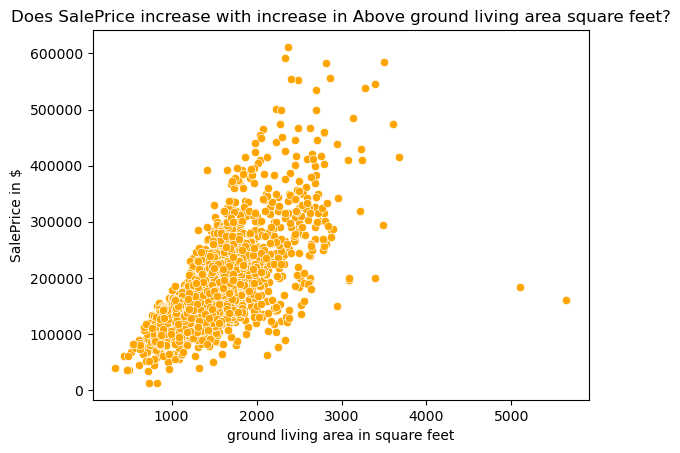

In [17]:
#similarly using second highest correlation to find similar outlier

sns.scatterplot(x=df['Gr Liv Area'],y=df['SalePrice'], color = 'orange')
plt.title('Does SalePrice increase with increase in Above ground living area square feet?')
plt.ylabel('SalePrice in $')
plt.xlabel('ground living area in square feet');

We see two distinct points with high above grade living area but low sale price.

In [18]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<200000)]

#to check for outlier points

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
960,1499,908154235,60,RL,313.0,63887,Pave,NoAccess,IR3,Bnk,...,0,480,Gd,NoFence,NoMisc,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NoAccess,IR1,Bnk,...,0,0,NoPool,NoFence,Elev,17000,10,2007,New,183850


In [19]:
row_1499 = df.loc[df['Id'] == 1499]
print(row_1499.to_string(index=False))

  Id       PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street    Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd Functional  Fireplaces Fireplace Qu Garage Type Garage Yr Blt Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area Pool QC   Fence Misc Feature  Misc Val  Mo Sold  Yr Sold Sale Type  SalePrice
1499 908154235           60        RL         3

In [20]:
df = df.drop(index=[125,960,1885],axis=0)    # dropping the outliers 3 in total

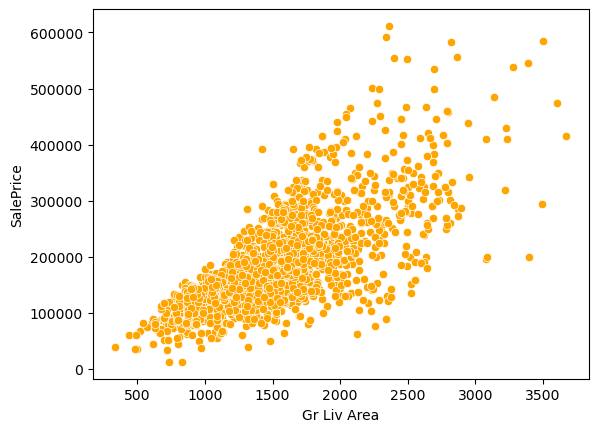

In [21]:
#checking for the plot once they are removed

sns.scatterplot(x=df['Gr Liv Area'],y=df['SalePrice'], color = 'orange');

In [22]:
df['SalePrice'].describe()

count      2046.000000
mean     181494.041056
std       79285.785628
min       12789.000000
25%      129812.500000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

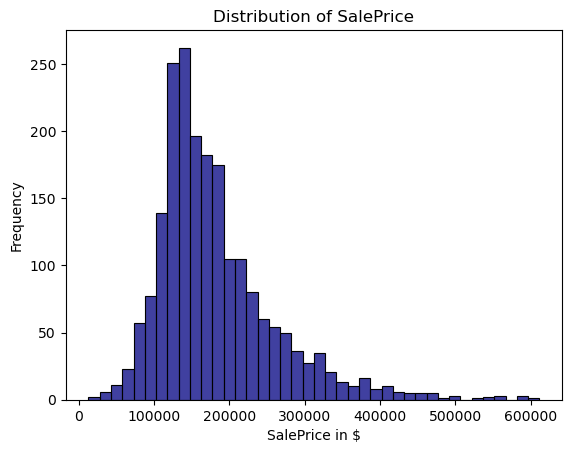

In [23]:
import matplotlib.pyplot as plt

# Plot histogram for SalePrice
sns.histplot(df['SalePrice'],bins=40, color = 'navy')
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice in $')
plt.ylabel('Frequency')
plt.show()

SalePrice is right-skewed i.e. most of data points are concentrated on left of distribution. 

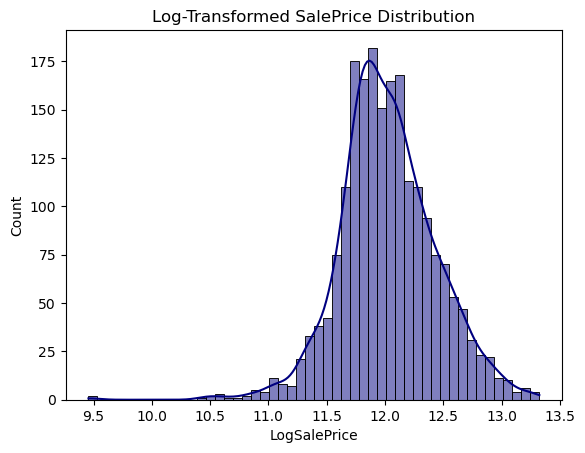

In [24]:
#log transforming
df['LogSalePrice'] = np.log(df['SalePrice']) 

sns.histplot(df['LogSalePrice'], bins=50, kde=True, color= 'navy')
plt.title("Log-Transformed SalePrice Distribution")
plt.show()

Applying log to SalePrice reduces the skewness and makes it more normally distributed, which is what we will be using for out prediction instead of SalePrice

In [25]:
df['MS SubClass'] = df['MS SubClass'].astype(str) # change into string because it is categrical variable

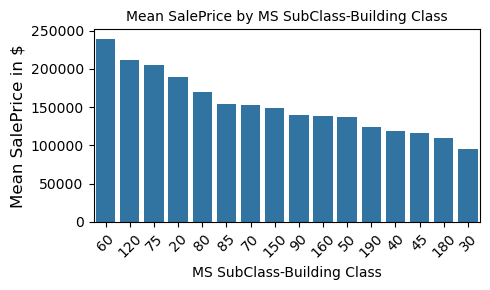

In [26]:
mean_by_subclass = df.groupby('MS SubClass')['SalePrice'].mean().sort_values(ascending=False)

#bar chart
plt.figure(figsize=(5, 3))
sns.barplot(x=mean_by_subclass.index, y=mean_by_subclass.values)

plt.title('Mean SalePrice by MS SubClass-Building Class', fontsize=10)
plt.xlabel('MS SubClass-Building Class', fontsize=10)
plt.ylabel('Mean SalePrice in $', fontsize=12)
plt.xticks(rotation=45)  
plt.tight_layout()

# Show the plot
plt.show()

In [27]:
print(df['MS SubClass'].dtypes)

object


/var/folders/tz/0fmlhgw57372kmv1d768_d_00000gn/T/ipykernel_51004/604608403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=garage_counts.index, y=garage_counts.values, palette='viridis')


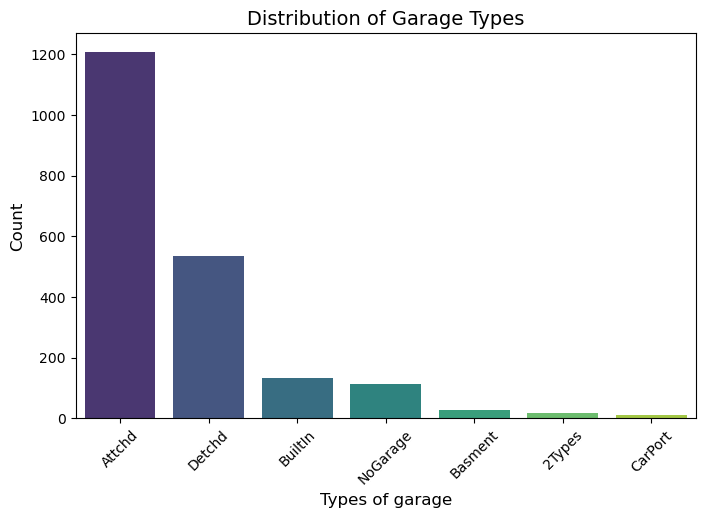

In [28]:
garage_counts = df['Garage Type'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=garage_counts.index, y=garage_counts.values, palette='viridis')

# Labels and title
plt.xlabel('Types of garage', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Garage Types', fontsize=14)
plt.xticks(rotation=45)  

# Show the plot
plt.show()

In [29]:
df = pd.get_dummies(df, columns=['Garage Type'], dtype = int , drop_first=True)

print(df.head())  

    Id        PID MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  109  533352170          60        RL       69.0552     13517   Pave   
1  544  531379050          60        RL       43.0000     11492   Pave   
2  153  535304180          20        RL       68.0000      7922   Pave   
3  318  916386060          60        RL       73.0000      9802   Pave   
4  255  906425045          50        RL       82.0000     14235   Pave   

      Alley Lot Shape Land Contour  ... Yr Sold Sale Type SalePrice  \
0  NoAccess       IR1          Lvl  ...    2010       WD     130500   
1  NoAccess       IR1          Lvl  ...    2009       WD     220000   
2  NoAccess       Reg          Lvl  ...    2010       WD     109000   
3  NoAccess       Reg          Lvl  ...    2010       WD     174000   
4  NoAccess       IR1          Lvl  ...    2010       WD     138500   

  LogSalePrice Garage Type_Attchd Garage Type_Basment Garage Type_BuiltIn  \
0    11.779129                  1                  

In [30]:
kaggle_data = pd.read_csv('datasets/test.csv')
kaggle_data.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


## Modeling

In [31]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [32]:
# Load the datasets
train_df = df

In [33]:
# Set up our X and y variables.
#lesson 306
y = train_df['SalePrice']  # y = output, what we want to predict
X = train_df[['Overall Qual', 'Garage Area','Lot Area', 'Lot Frontage','Gr Liv Area','Year Built', 'Year Remod/Add','Fireplaces','Total Bsmt SF','Overall Cond','Garage Type_Attchd',
       'Garage Type_Basment', 'Garage Type_BuiltIn', 'Garage Type_CarPort',
       'Garage Type_Detchd', 'Garage Type_NoGarage','Mo Sold','Yr Sold', 'Garage Type_Attchd', 'Garage Type_Basment',
       'Garage Type_BuiltIn', 'Garage Type_CarPort', 'Garage Type_Detchd',
       'Garage Type_NoGarage']]
# X = inputs, what we use in order to predict y

In [34]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [35]:
#Initialize and fit the model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [36]:
# How did we do on the train vs test data?

lr.score(X_train, y_train)
# .score() will return R^2 value or coefficient of determination

print(f"Training R²: {lr.score(X_train, y_train)}")


Training R²: 0.849970346253835


In [37]:
#make predictions
y_pred_train = lr.predict(X_train)

# rmse 
rmse_train = metrics.root_mean_squared_error(y_train, y_pred_train)
print(f"Training RMSE: {rmse_train}")


Training RMSE: 30487.588327289377


My Training RMSE is 30487.58 i.e. My model's predictions are off by $30487.58 on average.
My Training R²is 85% i.e. 85% of variance in the Sale Price is explained by my model's input.  

In [39]:

coefficients = lr.coef_
intercept = lr.intercept_

# intercept and coefficients
print(f"Intercept: {intercept}")
coeff_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients}).head(1)
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)  # Sort by magnitude

print(coeff_df)



Intercept: -820198.8937336085
        Feature   Coefficient
0  Overall Qual  17045.294134


Here according to my model, when all the predictors are 0, my sale price will be $40601.85.

Also with a level of increase in overall quality the sale price goes up by $19011.73, holding all else constant.

In [40]:
# predictions on the testing data
y_pred_test = lr.predict(X_test)

# RMSE and R² on testing data
rmse_test = metrics.root_mean_squared_error(y_test, y_pred_test)

# Calculate R² 
r2_test = r2_score(y_test, y_pred_test)

print(f"Testing RMSE: {rmse_test}")
print(f"Testing R²: {r2_test}")

Testing RMSE: 31557.212195194243
Testing R²: 0.8478705440285933


### Modeling  with given Kaggle test data 

In [41]:
# Load the datasets
train_df = df
test_df = kaggle_data

#shapes
print(f"Train Shape: {train_df.shape}, Test Shape: {test_df.shape}")

Train Shape: (2046, 85), Test Shape: (878, 80)


In [42]:
#dget_dummies and same imputation on test data as with train data
test_df['Garage Type'] = test_df['Garage Type'].fillna('NoGarage')
test_df = pd.get_dummies(test_df, columns=['Garage Type'], drop_first=True)

In [43]:
print(f"Train Shape: {train_df.shape}, Test Shape: {test_df.shape}")

Train Shape: (2046, 85), Test Shape: (878, 85)


In [44]:
#define  X and Ys
X_train = train_df[['Overall Qual', 'Garage Area','Lot Area', 'Lot Frontage','Gr Liv Area','Year Built', 'Year Remod/Add','Fireplaces','Total Bsmt SF','Overall Cond','Garage Type_Attchd',
       'Garage Type_Basment', 'Garage Type_BuiltIn', 'Garage Type_CarPort',
       'Garage Type_Detchd', 'Garage Type_NoGarage','Mo Sold','Yr Sold', 'Garage Type_Attchd', 'Garage Type_Basment',
       'Garage Type_BuiltIn', 'Garage Type_CarPort', 'Garage Type_Detchd',
       'Garage Type_NoGarage']]
y_train = train_df['SalePrice']


X_test = test_df[['Overall Qual', 'Garage Area','Lot Area', 'Lot Frontage','Gr Liv Area','Year Built', 'Year Remod/Add','Fireplaces','Total Bsmt SF','Overall Cond','Garage Type_Attchd',
       'Garage Type_Basment', 'Garage Type_BuiltIn', 'Garage Type_CarPort',
       'Garage Type_Detchd', 'Garage Type_NoGarage','Mo Sold','Yr Sold', 
        'Garage Type_Attchd', 'Garage Type_Basment',
       'Garage Type_BuiltIn', 'Garage Type_CarPort', 'Garage Type_Detchd',
       'Garage Type_NoGarage']]



#lesson 306

In [45]:
print(X_train.isnull().sum())  # Check missing values in training data
print(X_test.isnull().sum())  

Overall Qual            0
Garage Area             0
Lot Area                0
Lot Frontage            0
Gr Liv Area             0
Year Built              0
Year Remod/Add          0
Fireplaces              0
Total Bsmt SF           0
Overall Cond            0
Garage Type_Attchd      0
Garage Type_Basment     0
Garage Type_BuiltIn     0
Garage Type_CarPort     0
Garage Type_Detchd      0
Garage Type_NoGarage    0
Mo Sold                 0
Yr Sold                 0
Garage Type_Attchd      0
Garage Type_Basment     0
Garage Type_BuiltIn     0
Garage Type_CarPort     0
Garage Type_Detchd      0
Garage Type_NoGarage    0
dtype: int64
Overall Qual              0
Garage Area               0
Lot Area                  0
Lot Frontage            160
Gr Liv Area               0
Year Built                0
Year Remod/Add            0
Fireplaces                0
Total Bsmt SF             0
Overall Cond              0
Garage Type_Attchd        0
Garage Type_Basment       0
Garage Type_BuiltIn       0

In [46]:
X_test['Lot Frontage'] = X_test['Lot Frontage'].fillna(X_train['Lot Frontage'].median())  #use training data to fill missing

/var/folders/tz/0fmlhgw57372kmv1d768_d_00000gn/T/ipykernel_51004/1389188678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Lot Frontage'] = X_test['Lot Frontage'].fillna(X_train['Lot Frontage'].median())  #use training data to fill missing


In [47]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Yr Sold,Sale Type,SalePrice,LogSalePrice,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NoGarage
0,109,533352170,60,RL,69.0552,13517,Pave,NoAccess,IR1,Lvl,...,2010,WD,130500,11.779129,1,0,0,0,0,0
1,544,531379050,60,RL,43.0000,11492,Pave,NoAccess,IR1,Lvl,...,2009,WD,220000,12.301383,1,0,0,0,0,0
2,153,535304180,20,RL,68.0000,7922,Pave,NoAccess,Reg,Lvl,...,2010,WD,109000,11.599103,0,0,0,0,1,0
3,318,916386060,60,RL,73.0000,9802,Pave,NoAccess,Reg,Lvl,...,2010,WD,174000,12.066811,0,0,1,0,0,0
4,255,906425045,50,RL,82.0000,14235,Pave,NoAccess,IR1,Lvl,...,2010,WD,138500,11.838626,0,0,0,0,1,0


In [48]:
# Initialize and fit the model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [49]:
preds = lr.predict(X_test)

y_pred_train = lr.predict(X_train)

# rmse and bias
rmse_train = metrics.root_mean_squared_error(y_train, y_pred_train)
r2_train = r2_score((y_train), y_pred_train)
print(f"Training RMSE: {rmse_train}")

bias = np.mean((y_train) - (y_pred_train))
print(f"Training R²: {r2_train}")
print(f"Bias: {bias}")


coefficients = lr.coef_
intercept = lr.intercept_

# Print the intercept
print(f"Intercept: {intercept}")

# Print the coefficients along with their corresponding feature names
coeff_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients}).head(5)
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)  # Sort by magnitude

print(coeff_df)


Training RMSE: 30720.22878725225
Training R²: 0.8497997896919882
Bias: 1.7291601321214805e-10
Intercept: 143636.8989482548
        Feature   Coefficient
0  Overall Qual  17236.553258
3  Lot Frontage    173.715110
1   Garage Area     58.448046
4   Gr Liv Area     45.826266
2      Lot Area      0.956017


My bias is 1.7291601321214805e-10. Model is highly underfit. So, I will be aiming in adding complexities.

In [50]:
# Create submission DataFrame with transformed preds
submission1 = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': preds})

# Save to CSV
submission1.to_csv("submission1.csv", index=False)

## Model 2 : Optimal Model

In [51]:
train_df['LogSalePrice'] = np.log(train_df['SalePrice'])

In [52]:
#define  X and Ys
X_train = train_df[['Overall Qual', 'Garage Area','Lot Area', 'Lot Frontage','Gr Liv Area','Year Built', 'Year Remod/Add','Fireplaces','Total Bsmt SF','Overall Cond','Garage Type_Attchd',
       'Garage Type_Basment', 'Garage Type_BuiltIn', 'Garage Type_CarPort',
       'Garage Type_Detchd', 'Garage Type_NoGarage','Mo Sold','Yr Sold', 'Garage Type_Attchd', 'Garage Type_Basment',
       'Garage Type_BuiltIn', 'Garage Type_CarPort', 'Garage Type_Detchd',
       'Garage Type_NoGarage']]
y_train = train_df['LogSalePrice']


X_test = test_df[['Overall Qual', 'Garage Area','Lot Area', 'Lot Frontage','Gr Liv Area','Year Built', 'Year Remod/Add','Fireplaces','Total Bsmt SF','Overall Cond','Garage Type_Attchd',
       'Garage Type_Basment', 'Garage Type_BuiltIn', 'Garage Type_CarPort',
       'Garage Type_Detchd', 'Garage Type_NoGarage','Mo Sold','Yr Sold', 
        'Garage Type_Attchd', 'Garage Type_Basment',
       'Garage Type_BuiltIn', 'Garage Type_CarPort', 'Garage Type_Detchd',
       'Garage Type_NoGarage']]

#lesson 306

In [53]:
X_test['Lot Frontage'] = X_test['Lot Frontage'].fillna(X_train['Lot Frontage'].median())  #use training data to fill missing

/var/folders/tz/0fmlhgw57372kmv1d768_d_00000gn/T/ipykernel_51004/1389188678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Lot Frontage'] = X_test['Lot Frontage'].fillna(X_train['Lot Frontage'].median())  #use training data to fill missing


In [54]:
# Initialize the model
lr = LinearRegression()

In [55]:
#fit the model
lr.fit(X_train, y_train)

LinearRegression()

In [56]:

preds = lr.predict(X_test)

In [57]:
#reverse log using exp to get SalePrice
#lesson 308 
preds_saleprice = np.exp(preds)

In [58]:
#training data prediction
y_pred_train = lr.predict(X_train)

#reverse log using exp on prediction
y_pred_train_saleprice = np.exp(y_pred_train)

# calculate RMSE for training data
rmse_train = metrics.root_mean_squared_error(np.exp(y_train), y_pred_train_saleprice)

#R² with the transformed values
r2_train = r2_score(np.exp(y_train), y_pred_train_saleprice)
print(f"Training RMSE: {rmse_train}")
print(f"Training R²: {r2_train}")

coefficients = lr.coef_
intercept = lr.intercept_

print(f"Intercept: {intercept}")

# print the coefficients along with their corresponding feature names
coeff_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients}).head(5)
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)  # Sort by magnitude

print(coeff_df)

Training RMSE: 24334.03317038249
Training R²: 0.9057568397884087
Intercept: 13.434412524160928
        Feature  Coefficient
0  Overall Qual     0.084117
3  Lot Frontage     0.000970
4   Gr Liv Area     0.000251
1   Garage Area     0.000138
2      Lot Area     0.000004


My Training RMSE is 24334.03 i.e. My model's predictions are off by $24334.03 on average. My Training R²is 90% i.e. 90% of variance in the Sale Price is explained by my model's input.

My coefficient for overall quality is 0.084117, which means my sale price increases by 8.4%, for each increase in overall quality points. 

In [59]:
#Create submission DataFrame with transformed preds
submission2 = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': preds_saleprice})

# Save to CSV
submission2.to_csv("submission2.csv", index=False)

In [60]:
submission2

,Id,SalePrice
0,2658,158410.167176
1,2718,185186.160515
2,2414,198140.943993
3,1989,112413.648777
4,625,169020.313438
...,...,...
873,1662,194487.097885
874,1234,218975.811551
875,1373,128921.081113
876,1672,112136.581264


## Model 3

In [61]:
train_df['LogSalePrice'] = np.log(train_df['SalePrice'])


In [62]:
#define  X and Ys
X_train = train_df[['Overall Qual', 'Garage Area','Lot Area', 'Lot Frontage','Gr Liv Area','Year Built', 'Year Remod/Add','Fireplaces','Total Bsmt SF','Overall Cond','Garage Type_Attchd',
       'Garage Type_Basment', 'Garage Type_BuiltIn', 'Garage Type_CarPort',
       'Garage Type_Detchd', 'Garage Type_NoGarage','Mo Sold','Yr Sold', 'Garage Type_Attchd', 'Garage Type_Basment',
       'Garage Type_BuiltIn', 'Garage Type_CarPort', 'Garage Type_Detchd',
       'Garage Type_NoGarage']]
y_train = train_df['LogSalePrice']


X_test = test_df[['Overall Qual', 'Garage Area','Lot Area', 'Lot Frontage','Gr Liv Area','Year Built', 'Year Remod/Add','Fireplaces','Total Bsmt SF','Overall Cond','Garage Type_Attchd',
       'Garage Type_Basment', 'Garage Type_BuiltIn', 'Garage Type_CarPort',
       'Garage Type_Detchd', 'Garage Type_NoGarage','Mo Sold','Yr Sold', 
        'Garage Type_Attchd', 'Garage Type_Basment',
       'Garage Type_BuiltIn', 'Garage Type_CarPort', 'Garage Type_Detchd',
       'Garage Type_NoGarage']]

#lesson 306

In [63]:
X_test['Lot Frontage'] = X_test['Lot Frontage'].fillna(X_train['Lot Frontage'].median())  #use training data to fill missing

/var/folders/tz/0fmlhgw57372kmv1d768_d_00000gn/T/ipykernel_33947/1389188678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Lot Frontage'] = X_test['Lot Frontage'].fillna(X_train['Lot Frontage'].median())  #use training data to fill missing


In [64]:
#lesson 403
# standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [65]:
# predictons
y_pred_train = lr.predict(X_train_scaled)
y_pred_test = lr.predict(X_test_scaled)

# Reverse log 
y_pred_train_saleprice = np.exp(y_pred_train)
y_pred_test_saleprice = np.exp(y_pred_test)

# rmse
rmse_train = metrics.root_mean_squared_error(y_train, y_pred_train_saleprice)

# R² for training data
r2_train = r2_score(np.exp(y_train), np.exp(y_pred_train))

print(f"Training RMSE: {rmse_train}")
print(f"Training R²: {r2_train}")


Training RMSE: 194844.51405277985
Training R²: 0.9053061044363213


In [66]:
y_pred_test_saleprice

array([158725.55129684, 184087.11163159, 198269.6213453 , 112773.31515848,
       168433.64783667, 100772.95497878, 114549.23646195, 155655.52122847,
       184627.22012969, 180916.5713676 , 158074.32413767, 128289.05926214,
       155471.70689799, 308928.31931738, 164726.41277555, 120727.27527672,
       156570.24252869, 114749.65338837, 203566.96474842, 199629.62323284,
       153960.81790542, 119812.33196639, 198463.3385955 , 155927.85827852,
       203409.96882113, 126053.68256667, 111982.06962617, 106147.84307347,
       143367.18669204,  65658.07033874, 115222.39360851,  92222.84425205,
       214424.53715491, 155623.60889558, 222051.44257856, 181964.64294443,
       122653.59953951,  90156.03495172, 111002.16474789, 197537.14020518,
       150278.33154475, 217756.578898  , 145370.54904829, 150890.82156318,
       219678.89036304, 107935.17716106, 217331.68814728, 112553.26973537,
       125536.50319051, 115988.96019626, 103486.61113607, 187390.04436382,
       266800.93762061, 1

In [67]:
# Create submission DataFrame with transformed preds
submission3 = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': y_pred_test_saleprice})

# Save to CSV
submission3.to_csv("submission3.csv", index=False)

## Model 4 : Lasso

In [68]:
#define  X and Ys
X_train = train_df[['Overall Qual', 'Garage Area','Lot Area', 'Lot Frontage','Gr Liv Area','Year Built', 'Year Remod/Add','Fireplaces','Total Bsmt SF','Overall Cond','Garage Type_Attchd',
       'Garage Type_Basment', 'Garage Type_BuiltIn', 'Garage Type_CarPort',
       'Garage Type_Detchd', 'Garage Type_NoGarage','Mo Sold','Yr Sold', 'Garage Type_Attchd', 'Garage Type_Basment',
       'Garage Type_BuiltIn', 'Garage Type_CarPort', 'Garage Type_Detchd',
       'Garage Type_NoGarage']]
y_train = train_df['SalePrice']


X_test = test_df[['Overall Qual', 'Garage Area','Lot Area', 'Lot Frontage','Gr Liv Area','Year Built', 'Year Remod/Add','Fireplaces','Total Bsmt SF','Overall Cond','Garage Type_Attchd',
       'Garage Type_Basment', 'Garage Type_BuiltIn', 'Garage Type_CarPort',
       'Garage Type_Detchd', 'Garage Type_NoGarage','Mo Sold','Yr Sold', 
        'Garage Type_Attchd', 'Garage Type_Basment',
       'Garage Type_BuiltIn', 'Garage Type_CarPort', 'Garage Type_Detchd',
       'Garage Type_NoGarage']]

#lesson 306

In [69]:
X_test['Lot Frontage'] = X_test['Lot Frontage'].fillna(X_train['Lot Frontage'].median())
#use training data to fill missing

/var/folders/tz/0fmlhgw57372kmv1d768_d_00000gn/T/ipykernel_33947/613012357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Lot Frontage'] = X_test['Lot Frontage'].fillna(X_train['Lot Frontage'].median())


In [70]:

# initialize and fit the model 
lasso = Lasso(alpha=0.1)  
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [74]:

# Generate predictions on test data
preds = lasso.predict(X_test)

y_pred_train = lasso.predict(X_train)

rmse_train = metrics.root_mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"Training RMSE: {rmse_train}")
print(f"Training R²: {r2_train}")


Training RMSE: 30720.229525396673
Training R²: 0.8497997824739789


In [75]:
# Create submission DataFrame with transformed preds
submission4 = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': preds})

# Save to CSV
submission4.to_csv("submission4.csv", index=False)